## Promedio, moda y mediana

In [17]:
import pandas as pd

df = pd.read_csv('../data/raw/wine_data.csv', delimiter=",")

In [18]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


In [19]:
df_stats = df.describe().T
print(df_stats)

                        count        mean         std      min         25%  \
fixed_acidity         21000.0    9.797079    2.413919  3.80000    7.600000   
volatile_acidity      21000.0    0.774796    0.365015  0.08000    0.430000   
citric_acid           21000.0    0.793870    0.384833  0.00000    0.410000   
residual_sugar        21000.0   31.289348   19.015391  0.60000    9.800000   
chlorides             21000.0    0.200245    0.124933  0.00900    0.072000   
free_sulfur_dioxide   21000.0  129.442333   77.167262  1.00000   45.000000   
total_sulfur_dioxide  21000.0  229.008762  100.183265  6.00000  150.000000   
density               21000.0    1.009972    0.012032  0.98711    0.997417   
pH                    21000.0    3.158712    0.171371  2.72000    3.030000   
sulphates             21000.0    1.020641    0.408304  0.22000    0.620000   
alcohol               21000.0   11.291716    1.182198  8.00000   10.400000   
quality               21000.0    6.000000    2.000048  3.00000  

In [21]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print('Columnas numericas: ', numerical_cols)

Columnas numericas:  Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [7]:
#Se eliminan todas las columnas y filas que contengan datos NaN
df_cleaned = df.dropna(axis=1, how='all')
df_cleaned.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


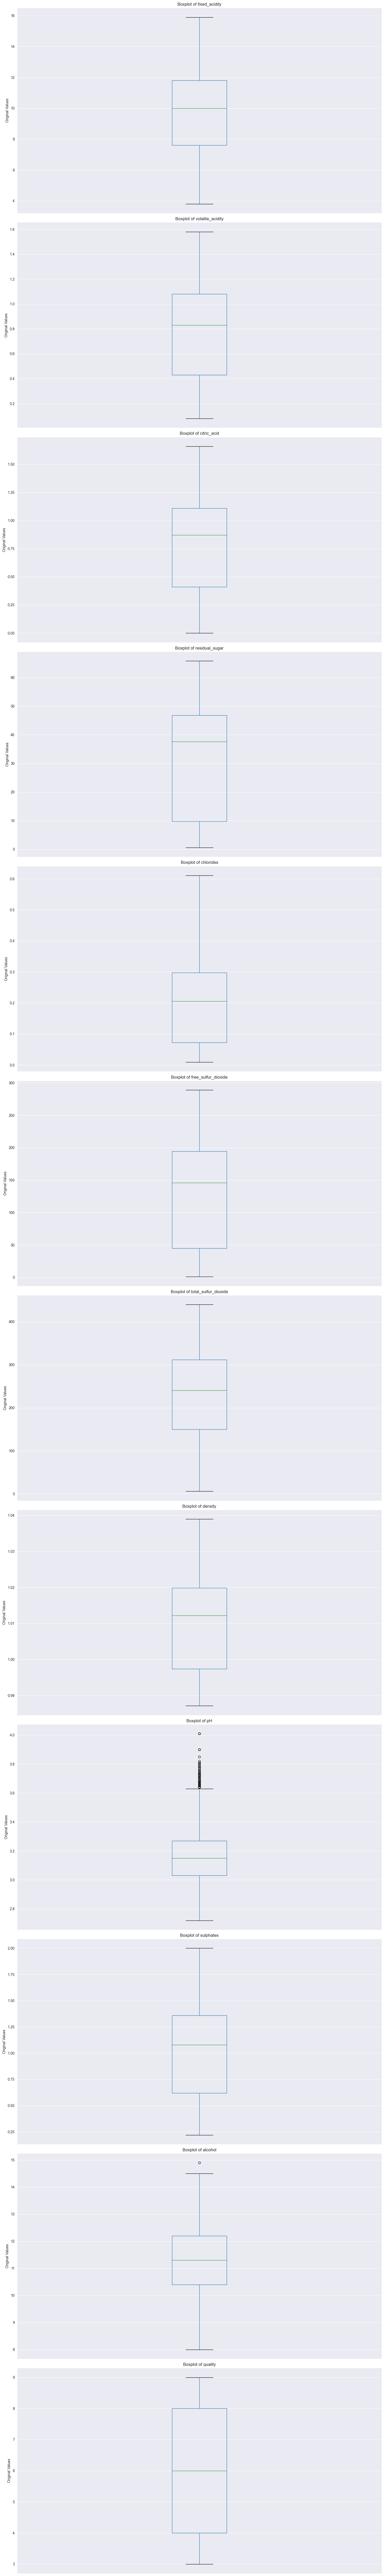

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,100))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    df.boxplot([column])
    plt.title(f"Boxplot of {column}")
    plt.ylabel("Original Values")
    plt.xticks([])  

plt.tight_layout()
plt.show()

In [24]:
# Vamos a remover outliers
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

cleaned_df = remove_outliers(df_cleaned, numerical_cols)
cleaned_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,20889.000000,20889.000000,20889.000000,20889.000000,20889.000000,20889.000000,20889.000000,20889.000000,20889.000000,20889.000000,20889.000000,20889.000000
mean,9.808653,0.775769,0.795073,31.365618,0.200474,129.713773,229.394763,1.010012,3.155828,1.021641,11.291384,5.998947
std,2.406192,0.364954,0.383734,18.989679,0.124853,77.100090,100.053995,0.012025,0.167038,0.408555,1.182045,2.001842
min,3.900000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.600000,0.430000,0.420000,10.000000,0.073000,46.000000,150.000000,0.997480,3.030000,0.620000,10.400000,4.000000
50%,10.000000,0.830000,0.870000,37.700000,0.205000,146.100000,241.100000,1.012220,3.150000,1.080000,11.300000,6.000000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.400000,311.800000,1.019860,3.270000,1.360000,12.200000,8.000000
max,15.600000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,3.630000,2.000000,14.500000,9.000000


## Matriz de correlación
Para calcular nuestra matriz de correlacion, lo que hicimos fue tomar la base de datos, convertir a valores numericos aquellos campos que no fueran de este tipo y por ultimo eliminar aquellas columnas las cuales fueran todas NaN.
Una vez que 'limpiamos' la base de datos, dibujamos la matriz.

In [25]:
df_cleaned_stats = cleaned_df.describe().T

df_norm = (cleaned_df - df_cleaned_stats['mean']) / df_cleaned_stats['std']  
# Para normalizar: (valor - promedio) / desv_estandar

df_norm_stats = df_norm.describe().T
print(df_norm_stats)


                        count          mean  std       min       25%  \
fixed_acidity         20889.0  4.353941e-17  1.0 -2.455603 -0.917904   
volatile_acidity      20889.0 -2.612365e-16  1.0 -1.906460 -0.947434   
citric_acid           20889.0 -6.530911e-17  1.0 -2.071937 -0.977430   
residual_sugar        20889.0  2.938910e-16  1.0 -1.620123 -1.125117   
chlorides             20889.0 -2.176970e-17  1.0 -1.533597 -1.020995   
free_sulfur_dioxide   20889.0 -2.176970e-17  1.0 -1.669437 -1.085780   
total_sulfur_dioxide  20889.0 -2.176970e-16  1.0 -2.232742 -0.793519   
density               20889.0 -1.750284e-14  1.0 -1.904487 -1.042123   
pH                    20889.0 -2.748425e-15  1.0 -2.609162 -0.753293   
sulphates             20889.0  2.612365e-16  1.0 -1.962137 -0.983077   
alcohol               20889.0  1.088485e-16  1.0 -2.784483 -0.754104   
quality               20889.0 -1.741576e-16  1.0 -1.498094 -0.998554   

                           50%       75%       max  
fixed_acid

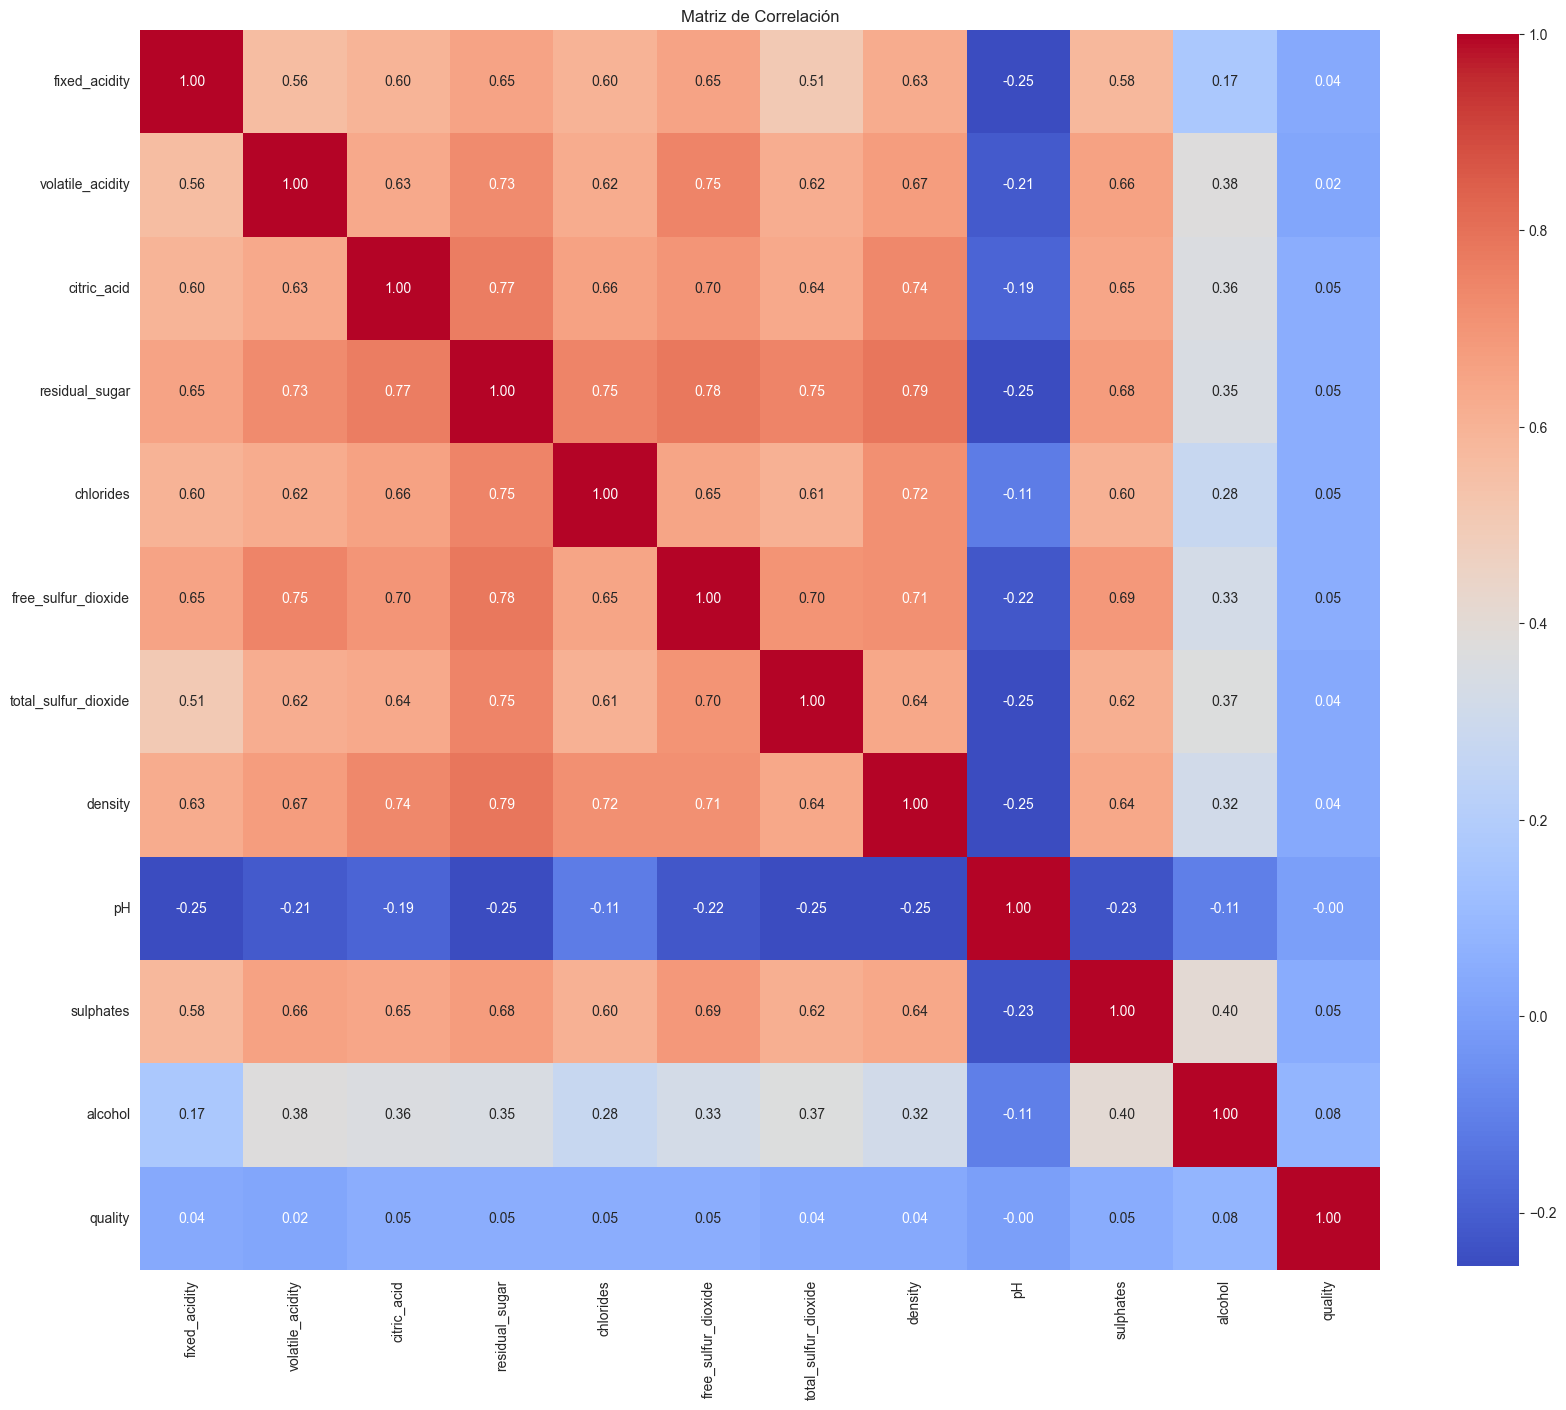

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt


correlations = df.corr(method='pearson')

plt.figure(figsize=(20, 20))

sns.heatmap(correlations, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Matriz de Correlación')
plt.show()
